## Introduction

1. Dataset Introduction

    This dataset contains text I collected from twitter api. The text mainly talks about the users' reviews about consumers privacy by using media. 
    Then I use sentiment analysis to determine the users' attitudes (Neutral, Positive, Negaitve) and assign a attitude socres about their texts. 
    There are 1299 rows and 4 columns in this dataset. 

        Unnamed: 0 : The number id of each content

        text: Each review from twitter users

        result: Sentiment classification of each text(Positive, Neutral, Negative)

        scores: Attitude scores. How likely the attitude to be Neutral, Postive, Negative

2. Methods I plan to use

    Support Vector Machine

    Support Vector Machine (SVM) is a kind of generalized linear classifier ​​that performs binary classification on data according to supervised learning, and its decision boundary is the maximum margin for solving the learning samples Hyperplane (maximum-margin hyperplane).

    SVM uses the hinge loss function (hinge loss) to calculate the empirical risk and adds a regularization term to the solution system to optimize the structural risk (structural risk). It is a sparse and robust classifier. SVM can perform nonlinear classification through the kernel method, which is one of the common kernel learning methods

    Linearly Separable SVM
        When the training data is linearly separable, a linear classifier can be learned by maximizing the hard margin (hard margin, what is hard and soft margin will be discussed below), that is, hard margin SVM, such as H3 in the above figure.
    Linear SVM
        When the training data is not linearly separable but can be approximately linearly separable, a linear classifier can also be learned by maximizing the soft margin, that is, soft margin SVM.
    Nonlinear SVM
        When the training data is linearly inseparable, a non-linear SVM can be learned by using the kernel trick and soft margin maximization.
    
3. Steps 

Import datasets

        Drop unnecessary columns from the dataset(From this dataset, I mainly use text and result columns)

Basic data exploration

    Make some necessary EDA plots to get some first insight of the dataset. 

    I will use y = "result" (output_score) and "text" as feature. 

    Then I will reprocess the column text (Important!)

            1. Drop NA
            2. Change all letters to lower case
            3. Broke the sentence into words
            4. Remove stopwords

Split Dataset

        I will split dataset into 80% training data and 20% test data to get better prediction for SVM

Training the model and Testing the results

        Use x_train,y_train to build a model of SVM

        Evaluate the performance of the SVM model by using the test data. 
            
            Train different kernel in order to get the best performance of model

            Generate a confusion matrix plot for SVM model to evaluate the performance
    
Conclusion

        Gather the result of the SVM performance

#### Step 1 Import Dataset

##### Read dataset in pd.read_csv and display first several rows.

In [1]:
# Read dataset in pd.read_csv and display first several rows.
import pandas as pd
df = pd.read_csv("../data/01-modified-data/pytweetresult.csv")
df.head()

,Unnamed: 0,text,result,scores
0,0,A more memorable connection is one that respec...,Positive,15.4
1,1,A more memorable connection is one that respec...,Positive,15.4
2,2,RT @OkeyMor57: @jay_scherrer @muskQu0tes @elon...,Negative,24.2
3,3,@jay_scherrer @muskQu0tes @elonmusk Elon Musk ...,Negative,14.0
4,4,@DanKnightMMA Dear Dan - you seem like an enga...,Positive,26.0


##### Print shape and columns of the dataset and describe the dataset

In [2]:
# Print shape and columns of the dataset and describe the dataset
print(df.shape)
print(df.columns)
print(df.describe)

(1300, 4)
Index(['Unnamed: 0', 'text', 'result', 'scores'], dtype='object')
<bound method NDFrame.describe of       Unnamed: 0                                               text    result  \
0              0  A more memorable connection is one that respec...  Positive   
1              1  A more memorable connection is one that respec...  Positive   
2              2  RT @OkeyMor57: @jay_scherrer @muskQu0tes @elon...  Negative   
3              3  @jay_scherrer @muskQu0tes @elonmusk Elon Musk ...  Negative   
4              4  @DanKnightMMA Dear Dan - you seem like an enga...  Positive   
...          ...                                                ...       ...   
1295        1295  When corporations write the rules, they only p...  Positive   
1296        1296  The American Data Privacy Protection Act (ADPP...  Positive   
1297        1297  Consumer privacy predictions—how marketers wil...  Negative   
1298        1298  To balance the advertisement benefits for busi...  Positive   

#### Step 2: Basic data exploration

##### Insert code to explore the load balance and count the times infl_score = 0 and infl_score = 1

In [3]:
#Insert code to explore the load balance and count the times infl_score = 0 and infl_score = 1
print("Number of points with result = Negative:",sum(df['result']=='Negative'),sum(df['result']=='Negative')/(sum(df['result']=='Negative')+sum(df['result']=='Neutral')+sum(df['result']=='Positive')))
print("Number of points with result = Neutral:",sum(df['result']=='Neutral'),sum(df['result']=='Neutral')/(sum(df['result']=='Negative')+sum(df['result']=='Neutral')+sum(df['result']=='Positive')))
print("Number of points with result = Neutral:",sum(df['result']=='Positive'),sum(df['result']=='Positive')/(sum(df['result']=='Negative')+sum(df['result']=='Neutral')+sum(df['result']=='Positive')))

Number of points with result = Negative: 416 0.32
Number of points with result = Neutral: 286 0.22
Number of points with result = Neutral: 598 0.46


##### Make Visulization plot of EDA

<AxesSubplot:>

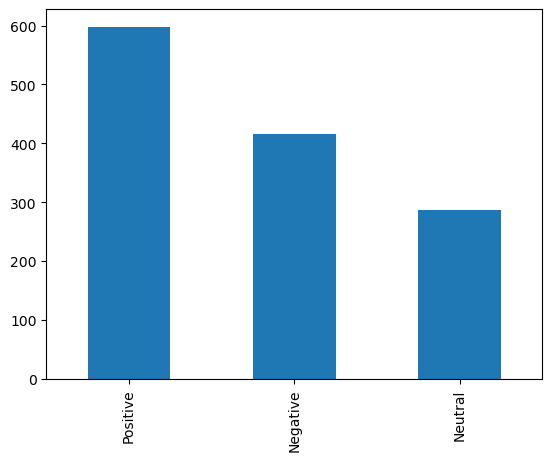

In [4]:
df['result'].value_counts().plot(kind="bar")

As we can see in the plot, Neutral is above 50% in the result of this dataset, the second more value is Postive, then is Negative

##### Drop unnecessary columns

In [5]:
df = df.drop(['Unnamed: 0','scores'],axis=1) #Drop unnecessary columns

In [6]:
# Import required packages
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

##### Data preprocessing

In [7]:
# insert code to remove blank rows if any.
df['text'].dropna()
# Change all the text to lower case.
df['text'] = [entry.lower() for entry in df['text']]
# Tokenization In this each entry in the df will be broken into set of words
df['text'] = [word_tokenize(entry) for entry in df['text']]
# Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text_final'] = str(Final_words)
df.head()

,text,result,text_final
0,"[a, more, memorable, connection, is, one, that...",Positive,"['memorable', 'connection', 'one', 'respect', ..."
1,"[a, more, memorable, connection, is, one, that...",Positive,"['memorable', 'connection', 'one', 'respect', ..."
2,"[rt, @, okeymor57, :, @, jay_scherrer, @, musk...",Negative,"['rt', 'elonmusk', 'elon', 'musk', 'challenge'..."
3,"[@, jay_scherrer, @, muskqu0tes, @, elonmusk, ...",Negative,"['elonmusk', 'elon', 'musk', 'challenge', 'don..."
4,"[@, danknightmma, dear, dan, -, you, seem, lik...",Positive,"['danknightmma', 'dear', 'dan', 'seem', 'like'..."


##### Drop initial text column

In [8]:
df = df.drop(['text'],axis=1) # Drop Initial text column
df.head()

,result,text_final
0,Positive,"['memorable', 'connection', 'one', 'respect', ..."
1,Positive,"['memorable', 'connection', 'one', 'respect', ..."
2,Negative,"['rt', 'elonmusk', 'elon', 'musk', 'challenge'..."
3,Negative,"['elonmusk', 'elon', 'musk', 'challenge', 'don..."
4,Positive,"['danknightmma', 'dear', 'dan', 'seem', 'like'..."


#### Step 3 Split dataset

In [9]:
# Insert code to partition datasets into training and testing datasets and print types and shapes of these datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text_final'],df['result'],test_size=0.8)
print(type(x_train),x_train.shape)
print(type(y_train),y_train.shape)
print(type(x_test),x_test.shape)
print(type(y_test),y_test.shape)

<class 'pandas.core.series.Series'> (260,)
<class 'pandas.core.series.Series'> (260,)
<class 'pandas.core.series.Series'> (1040,)
<class 'pandas.core.series.Series'> (1040,)


Insert code to encode the column infl_score with value between 0 and 1 and 2. 0 represents Negative, 1 represents Neutral, 2 represnets Positive

In [10]:
# Insert code to encode the column infl_score with value between 0 and 1 and 2. 0 represents Negative, 1 represents Neutral, 2 represnets Positive
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

Word Vectorization

One sentence summarizes the use of word vectors: it provides a mathematical method to convert symbolic information such as natural language into digital information in the form of vectors. This transforms natural language problems into machine learning problems.

The most commonly used word vector models are nothing more than one-hot Representation model and distributed representation model.

One-hot Representation
One-hot Representation uses a very long vector to represent a word. The length of the vector is the size N of the dictionary. Each vector has only one dimension which is 1, indicating the position of the word in the dictionary, and all other dimensions are 0.

Example:

"Mic" is expressed as [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 …]
"Mike" is expressed as [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 …]

If this One-hot Representation is stored in a sparse manner, it will be very concise, that is, assign a digital ID to each word. But this representation has two disadvantages:

(1) Suffering from the curse of dimensionality, the dimension of each word is the length of the corpus dictionary.
(2) Word encoding is often random, resulting in the inability to describe the similarity between words

Distributed representation
Distributed representation was first proposed by Hinton in 1986. It relies on the idea that the semantics of words is determined by contextual information, that is, words appearing in the same context have similar semantics.

Distributed representation
Distributed representation was first proposed by Hinton in 1986. It relies on the idea that the semantics of words is determined by contextual information, that is, words appearing in the same context have similar semantics.

Distributed Representation vs. one-hot representation

Formally, the one-hot representation word vector is a sparse word vector whose length is the length of the dictionary, while the Distributed Representation is a fixed-length dense word vector. Generally it looks like this: [0.792, −0.177, −0.107, 0.109, −0.542, …]
Functionally, the biggest contribution of Distributed representation is to make related or similar words closer in distance.


In [11]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(x_train)
Test_X_Tfidf = Tfidf_vect.transform(x_test)
print(Train_X_Tfidf)

  (0, 431)	0.39343054767211405
  (0, 422)	0.39343054767211405
  (0, 421)	0.21270247409445098
  (0, 379)	0.10777508549892469
  (0, 324)	0.41978781772324697
  (0, 289)	0.39343054767211405
  (0, 241)	0.39343054767211405
  (0, 240)	0.13991072862375892
  (0, 230)	0.34177701917836245
  (0, 108)	0.1066932535925145
  (1, 421)	0.17578173050759396
  (1, 379)	0.08906756310785721
  (1, 339)	0.34692134804521224
  (1, 246)	0.3773440588795487
  (1, 206)	0.3773440588795487
  (1, 184)	0.42818082446664624
  (1, 129)	0.19797855636694156
  (1, 108)	0.08817351481134954
  (1, 93)	0.3773440588795487
  (1, 8)	0.42818082446664624
  (2, 379)	0.24765096259824637
  (2, 301)	0.622577221818474
  (2, 240)	0.3214938449001891
  (2, 108)	0.24516507532892332
  (2, 18)	0.622577221818474
  :	:
  (256, 156)	0.2365071214185549
  (256, 134)	0.2365071214185549
  (256, 108)	0.09740587612424956
  (256, 27)	0.14537183151680322
  (256, 11)	0.2365071214185549
  (256, 3)	0.14090351047368133
  (257, 379)	0.21636746718506106
  (257, 

Now the column text is ready to be fed into SVM algortithms.

#### Step 4 Training and Predicting the model

In [12]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVC = svm.SVC()
model = SVC.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
yp_train = model.predict(Train_X_Tfidf)
yp_test = model.predict(Test_X_Tfidf)

In [13]:
print("confusion matrix of train data:")
print(confusion_matrix(y_train,yp_train))
print(" ")
print("confusion matrix of test data:")
print(confusion_matrix(y_test,yp_test))
print(" ")
print("classification report of train data:")
print(classification_report(y_train,yp_train))
print(" ")
print("classification report of test data:")
print(classification_report(y_test,yp_test))

confusion matrix of train data:
[[ 81   0   0]
 [  0  49   0]
 [  0   0 130]]
 
confusion matrix of test data:
[[322   0  13]
 [  0 237   0]
 [  0   0 468]]
 
classification report of train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00       130

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

 
classification report of test data:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       335
           1       1.00      1.00      1.00       237
           2       0.97      1.00      0.99       468

    accuracy                           0.99      1040
   macro avg       0.99      0.99      0.99      1040
weighted avg       0.99      0.99      0.99      1040



In [14]:
# Save the results in a data frame. 
dic_train = classification_report(y_train,yp_train,output_dict=True)
dic_test = classification_report(y_test,yp_test,output_dict=True)
result_train = pd.DataFrame.from_dict(dic_train)
result_train = result_train.transpose()
result_test = pd.DataFrame.from_dict(dic_test)
result_test = result_test.transpose()

display the results data frame

In [15]:
# display the results data frame
print("result dataframe of train dataset:")
print(result_train)
print("")
print("result dataframe of test dataset:")
print(result_test)

result dataframe of train dataset:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     81.0
1                   1.0     1.0       1.0     49.0
2                   1.0     1.0       1.0    130.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    260.0
weighted avg        1.0     1.0       1.0    260.0

result dataframe of test dataset:
              precision    recall  f1-score    support
0              1.000000  0.961194  0.980213   335.0000
1              1.000000  1.000000  1.000000   237.0000
2              0.972973  1.000000  0.986301   468.0000
accuracy       0.987500  0.987500  0.987500     0.9875
macro avg      0.990991  0.987065  0.988838  1040.0000
weighted avg   0.987838  0.987500  0.987462  1040.0000


Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.

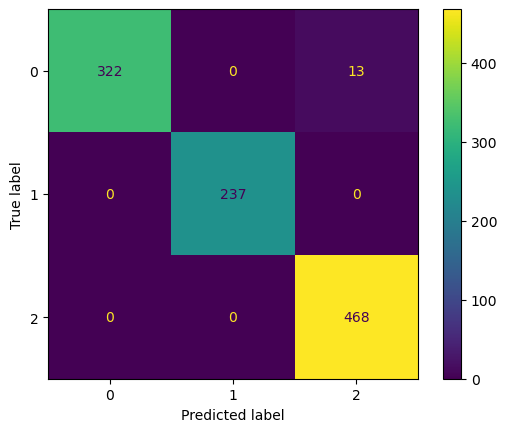

In [16]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
ConfusionMatrixDisplay.from_predictions(y_test, yp_test)

Comment: As we can see, the precision, recall, f1-score and support of accuracy are all about 96%, which we can conclude SVM is a good model to predict the sentiment analysis of this text dataset. 

##### Tuning Hyperparameters

Kernel: Kernel methods kernel methods (KMs) are a class of pattern recognition algorithms. Its purpose is to find and learn the mutual relationship in a set of data. Widely used kernel methods include support vector machines, Gaussian processes, etc.
The kernel method is an effective way to solve the problem of nonlinear pattern analysis. Its core idea is: first, the original data is embedded into a suitable high-dimensional feature space through some nonlinear mapping; then, the general linear learner is used in this New in-space analysis and processing modes.
Kernel methods have distinct advantages over the paradigm of using general-purpose nonlinear learners to analyze directly on raw data:
First of all, the general nonlinear learner is inconvenient to reflect the characteristics of specific application problems, while the nonlinear mapping of the kernel method is designed for specific application problems, which is convenient for integrating prior knowledge related to the problem.
Furthermore, linear learners have better overfitting control than nonlinear learners, which can better guarantee generalization performance.
Also, it is very important that the kernel method is still a way to achieve efficient calculations. It can use the kernel function to implicitly nonlinear mapping in the linear learner for simultaneous calculations, so that the computational complexity has nothing to do with the dimensionality of the high-dimensional feature space. 

In this dataset, I will train different kernels('poly','RBF' and 'Linear') to determine which suports the most accurate classifers.

##### SVM with Polynomial kernels

A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

K(x,xi) = 1 + sum(x * xi)^d

In [17]:
SVC = svm.SVC(C = 0.5,degree = 2,kernel='poly')
model = SVC.fit(Train_X_Tfidf, y_train)
yp_train = SVC.predict(Train_X_Tfidf)
yp_test = SVC.predict(Test_X_Tfidf)

Calculate the confusion matrix and classification report for the train and test data.

In [18]:
# Calculate the confusion matrix and classification report for the train and test data. 
print("confusion matrix of train data:")
print(confusion_matrix(y_train,yp_train))
print(" ")
print("confusion matrix of test data:")
print(confusion_matrix(y_test,yp_test))
print(" ")
print("classification report of train data:")
print(classification_report(y_train,yp_train))
print(" ")
print("classification reportof test data:")
print(classification_report(y_test,yp_test))

confusion matrix of train data:
[[ 80   0   1]
 [  0  49   0]
 [  0   0 130]]
 
confusion matrix of test data:
[[310   0  25]
 [  0 224  13]
 [  0   0 468]]
 
classification report of train data:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       1.00      1.00      1.00        49
           2       0.99      1.00      1.00       130

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260

 
classification reportof test data:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       335
           1       1.00      0.95      0.97       237
           2       0.92      1.00      0.96       468

    accuracy                           0.96      1040
   macro avg       0.97      0.96      0.96      1040
weighted avg       0.97      0.96      0.96      1040



In [19]:
# Save the results in a data frame.
dic_train = classification_report(y_train,yp_train,output_dict=True)
dic_test = classification_report(y_test,yp_test,output_dict=True)
result_train = pd.DataFrame.from_dict(dic_train)
result_train = result_train.transpose()
result_test = pd.DataFrame.from_dict(dic_test)
result_test = result_test.transpose()

display the results data frame

In [20]:
# display the results data frame
print("result dataframe of train dataset:")
print(result_train)
print("")
print("result dataframe of test dataset:")
print(result_test)

result dataframe of train dataset:
              precision    recall  f1-score     support
0              1.000000  0.987654  0.993789   81.000000
1              1.000000  1.000000  1.000000   49.000000
2              0.992366  1.000000  0.996169  130.000000
accuracy       0.996154  0.996154  0.996154    0.996154
macro avg      0.997455  0.995885  0.996652  260.000000
weighted avg   0.996183  0.996154  0.996149  260.000000

result dataframe of test dataset:
              precision    recall  f1-score      support
0              1.000000  0.925373  0.961240   335.000000
1              1.000000  0.945148  0.971800   237.000000
2              0.924901  1.000000  0.960986   468.000000
accuracy       0.963462  0.963462  0.963462     0.963462
macro avg      0.974967  0.956840  0.964675  1040.000000
weighted avg   0.966206  0.963462  0.963532  1040.000000


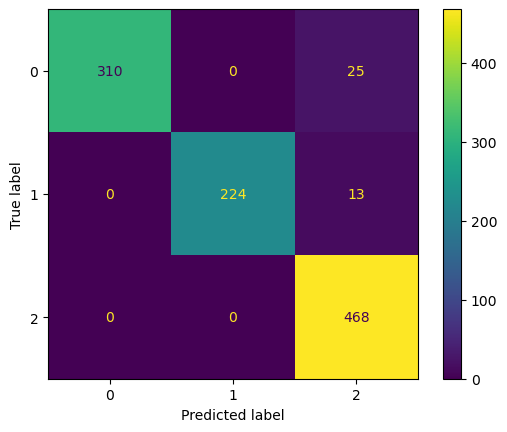

In [21]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
ConfusionMatrixDisplay.from_predictions(y_test, yp_test)

##### SVM with RBF kernels

Radial Basis Function Kernel The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

K(x,xi) = exp(-gamma * sum((x – xi^2))

In [22]:
SVC = svm.SVC(C = 0.5,kernel='rbf')
model = SVC.fit(Train_X_Tfidf, y_train)
yp_train = SVC.predict(Train_X_Tfidf)
yp_test = SVC.predict(Test_X_Tfidf)

display the results data frame

In [23]:
# Save the results in a data frame.
dic_train = classification_report(y_train,yp_train,output_dict=True)
dic_test = classification_report(y_test,yp_test,output_dict=True)
result_train = pd.DataFrame.from_dict(dic_train)
result_train = result_train.transpose()
result_test = pd.DataFrame.from_dict(dic_test)
result_test = result_test.transpose()
# display the results data frame
print("result dataframe of train dataset:")
print(result_train)
print("")
print("result dataframe of test dataset:")
print(result_test)

result dataframe of train dataset:
              precision    recall  f1-score     support
0              1.000000  0.975309  0.987500   81.000000
1              1.000000  0.938776  0.968421   49.000000
2              0.962963  1.000000  0.981132  130.000000
accuracy       0.980769  0.980769  0.980769    0.980769
macro avg      0.987654  0.971361  0.979018  260.000000
weighted avg   0.981481  0.980769  0.980720  260.000000

result dataframe of test dataset:
              precision    recall  f1-score      support
0              1.000000  0.889552  0.941548   335.000000
1              1.000000  0.793249  0.884706   237.000000
2              0.844765  1.000000  0.915851   468.000000
accuracy       0.917308  0.917308  0.917308     0.917308
macro avg      0.948255  0.894267  0.914035  1040.000000
weighted avg   0.930144  0.917308  0.917031  1040.000000


Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.

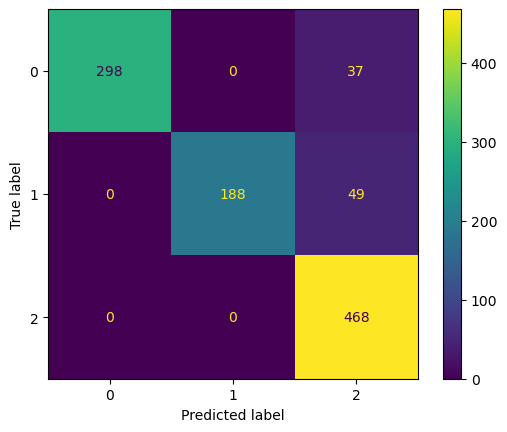

In [24]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
ConfusionMatrixDisplay.from_predictions(y_test, yp_test)

##### SVM with Linear Kernels

A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

K(x, xi) = sum(x * xi)

In [25]:
SVC = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
model = SVC.fit(Train_X_Tfidf, y_train)
yp_train = SVC.predict(Train_X_Tfidf)
yp_test = SVC.predict(Test_X_Tfidf)

In [26]:
# Save the results in a data frame.
dic_train = classification_report(y_train,yp_train,output_dict=True)
dic_test = classification_report(y_test,yp_test,output_dict=True)
result_train = pd.DataFrame.from_dict(dic_train)
result_train = result_train.transpose()
result_test = pd.DataFrame.from_dict(dic_test)
result_test = result_test.transpose()
# display the results data frame
print("result dataframe of train dataset:")
print(result_train)
print("")
print("result dataframe of test dataset:")
print(result_test)

result dataframe of train dataset:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     81.0
1                   1.0     1.0       1.0     49.0
2                   1.0     1.0       1.0    130.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    260.0
weighted avg        1.0     1.0       1.0    260.0

result dataframe of test dataset:
              precision    recall  f1-score    support
0              1.000000  0.961194  0.980213   335.0000
1              1.000000  1.000000  1.000000   237.0000
2              0.972973  1.000000  0.986301   468.0000
accuracy       0.987500  0.987500  0.987500     0.9875
macro avg      0.990991  0.987065  0.988838  1040.0000
weighted avg   0.987838  0.987500  0.987462  1040.0000


Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.

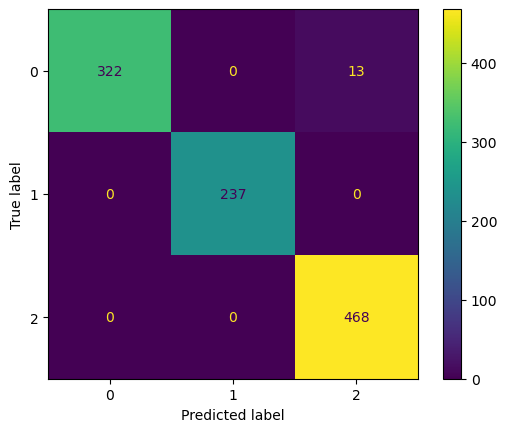

In [27]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
ConfusionMatrixDisplay.from_predictions(y_test, yp_test)

Comment: From the comparisons above from these three kernels, the linear permance best with showing the higher accuracy score of test which is almost 99%. The error made becomes smaller. 

#### Conclusion
From the above three kernels training performance, we can conclude that linear kernel is the most suitable kernel from above three kernels(poly, rbf, linear). The accuracy score is almost 96%. By using the the hyperparameter tunning, the accuracy is higher and the model becomes a more accurate classifier. 

SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space. However, SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

Overall, I think SVM is a suitable model to predict sentiment analysis of text data about consumer privacy. 

#### Reference
Wikimedia Foundation. (2022, December 2). Support Vector Machine. Wikipedia. Retrieved December 3, 2022, from https://en.wikipedia.org/wiki/Support_vector_machine 
